# K means clustering implementation- Unsupervised algorithm

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [8]:
data=pd.read_csv("Dataset.csv")

In [9]:
x=data.iloc[:,3:].values

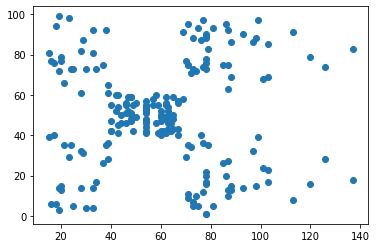

In [10]:
#plot the data among these two features
plt.scatter(x[:,0],x[:,1])

In [12]:
#to find the number of clusters WCSS(inertia) where we plot elbow graph to find k
wcss=[]
for i in range(1,11):  #trial and error
    k=KMeans(n_clusters=i,init="k-means++",random_state=0)
    k.fit(x)
    wcss.append(k.inertia_)

Text(0, 0.5, 'WCSS')

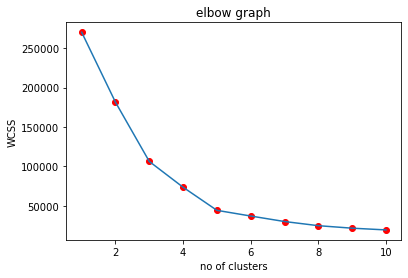

In [13]:
#plot a graph by taking iteration values and WCSS
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,c='r')
plt.title("elbow graph")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")

#### By looking into the elbow graph the optimal cluster values is 5(kvalue)

In [14]:
# let us find which dataset belongs to clusters
k=KMeans(n_clusters=5,init="k-means++",random_state=0)
y=k.fit_predict(x)   # will help us which data points belongs to cluster
y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [15]:
#position of the centroids at centers
k.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

Text(0, 0.5, 'spending score')

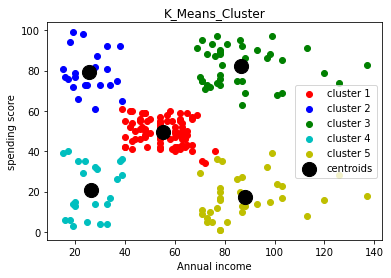

In [16]:
#plot the final graph
plt.scatter(x[y==0,0],x[y==0,1],c='r',label="cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],c='b',label="cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],c='g',label="cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],c='c',label="cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],c='y',label="cluster 5")
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],s=200,c='k',label="centroids")
plt.legend()
plt.title("K_Means_Cluster")
plt.xlabel("Annual income")
plt.ylabel("spending score")

## Intereption of the graph
#### Cluster 4: Less salary and less spending score
#### Cluster 2: Less salary and high spending score
#### Cluster 1: Average salary and average spending score
#### Cluster 3: High salary and High spending score(Offers can be provided)
#### Cluster 5: High salary and less spending score(discounts can be provided)